In [1]:
pip install prophet

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 3.2 MB/s eta 0:00:05
   ---------------------------------------- 0.1/13.3 MB 1.8 MB/s eta 0:00:08
    --------------------------------------- 0.2/13.3 MB 1.5 MB/s eta 0:00:09
    --------------------------------------- 0.2/13.3 MB 1.4 MB/s eta 0:00:10
    --------------------------------------- 0.3/13.3 MB 1.5 MB/s eta 0:00:09
   - -------------------------------------- 0.3/13.3 MB 1.4 MB/s eta 0:00:10
   - -------------------------------------- 0.4/13.3 MB 1.3 MB/s eta 0:00:10
   - -------------------------------------- 0.5/13.3 MB 1.4 MB/s eta 0:00:10
   - -------------------------------------- 0.6/13.3 MB 1.3 MB/s eta 0:00:10
   - -------------------------------------- 0.6/13.3 MB 1.3 MB/s eta 0:00:10
   - -------------------------------------- 0.6/13.3 MB 1.3 MB/s eta 0:00:10
   --

In [20]:
import pandas as pd
import json

with open('./datasets/bitcoin_2010_2024.json') as f:
    json_data = json.load(f)

bitcoin_df = pd.DataFrame(json_data['market-price'])
bitcoin_df

,x,y
0,1230940800000,0.00
1,1231286400000,0.00
2,1231632000000,0.00
3,1231977600000,0.00
4,1232323200000,0.00
...,...,...
1405,1716508800000,67942.23
1406,1716854400000,69374.17
1407,1717200000000,67484.93
1408,1717545600000,70553.24


In [21]:
from datetime import datetime

def changeDate(milis):
    timestamp = milis / 1000
    converted_time = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
    return converted_time

In [22]:
bitcoin_df.x = bitcoin_df.x.apply(changeDate)
bitcoin_df

,x,y
0,2009-01-03,0.00
1,2009-01-07,0.00
2,2009-01-11,0.00
3,2009-01-15,0.00
4,2009-01-19,0.00
...,...,...
1405,2024-05-24,67942.23
1406,2024-05-28,69374.17
1407,2024-06-01,67484.93
1408,2024-06-05,70553.24


In [23]:
bitcoin_df.set_index('x', inplace=True)
bitcoin_df

,y
x,
2009-01-03,0.00
2009-01-07,0.00
2009-01-11,0.00
2009-01-15,0.00
2009-01-19,0.00
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [24]:
bitcoin_df.index = pd.to_datetime(bitcoin_df.index)
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1410 entries, 2009-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1410 non-null   float64
dtypes: float64(1)
memory usage: 22.0 KB


In [25]:
bitcoin_df = bitcoin_df['2022-01-01':]

In [26]:
pre_b_df = bitcoin_df.reset_index()
pre_b_df

,x,y
0,2022-01-03,47327.87
1,2022-01-07,43120.63
2,2022-01-11,41849.00
3,2022-01-15,43099.37
4,2022-01-19,42381.48
...,...,...
218,2024-05-24,67942.23
219,2024-05-28,69374.17
220,2024-06-01,67484.93
221,2024-06-05,70553.24


In [27]:
pre_b_df = pre_b_df.rename(columns={'x':'ds'})
pre_b_df

,ds,y
0,2022-01-03,47327.87
1,2022-01-07,43120.63
2,2022-01-11,41849.00
3,2022-01-15,43099.37
4,2022-01-19,42381.48
...,...,...
218,2024-05-24,67942.23
219,2024-05-28,69374.17
220,2024-06-01,67484.93
221,2024-06-05,70553.24


In [28]:
from prophet import Prophet

model = Prophet().fit(pre_b_df)

future = model.make_future_dataframe(periods=365)


forecast = model.predict(future)
forecast[['ds', 'yhat', 'yearly_lower', 'yearly_upper']]

13:25:33 - cmdstanpy - INFO - Chain [1] start processing
13:25:33 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yearly_lower,yearly_upper
0,2022-01-03,41462.011126,-1432.269141,-1432.269141
1,2022-01-07,41741.741962,-1171.759830,-1171.759830
2,2022-01-11,41329.902044,-1196.378594,-1196.378594
3,2022-01-15,40125.476355,-1512.589498,-1512.589498
4,2022-01-19,39723.450288,-1988.174529,-1988.174529
...,...,...,...,...
583,2025-06-05,115741.510903,2342.885302,2342.885302
584,2025-06-06,116598.237382,2193.664667,2193.664667
585,2025-06-07,116090.169731,2017.252066,2017.252066
586,2025-06-08,115845.969887,1815.627671,1815.627671


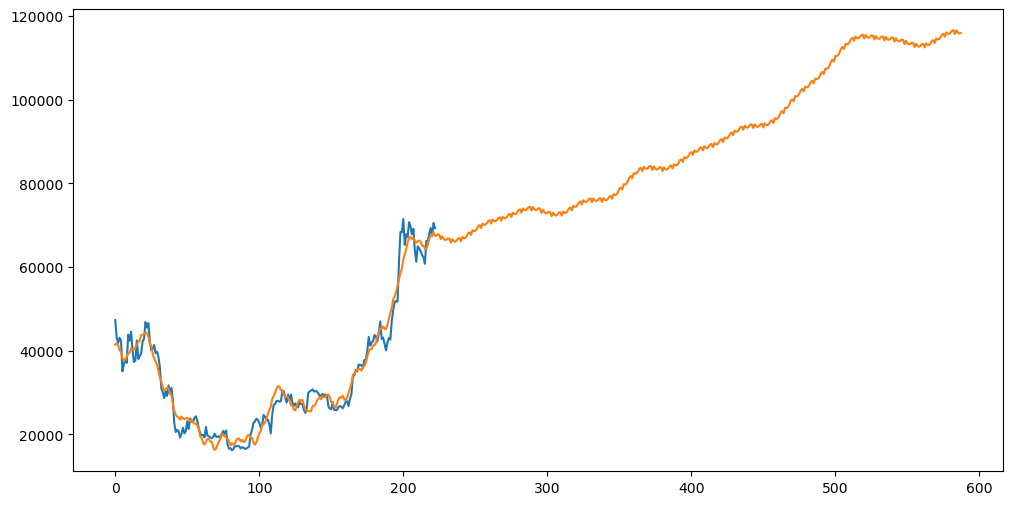

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(12,6))

plt.plot(pre_b_df[['y']], label='train')
plt.plot(forecast[['yhat']], label='train')

C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetim

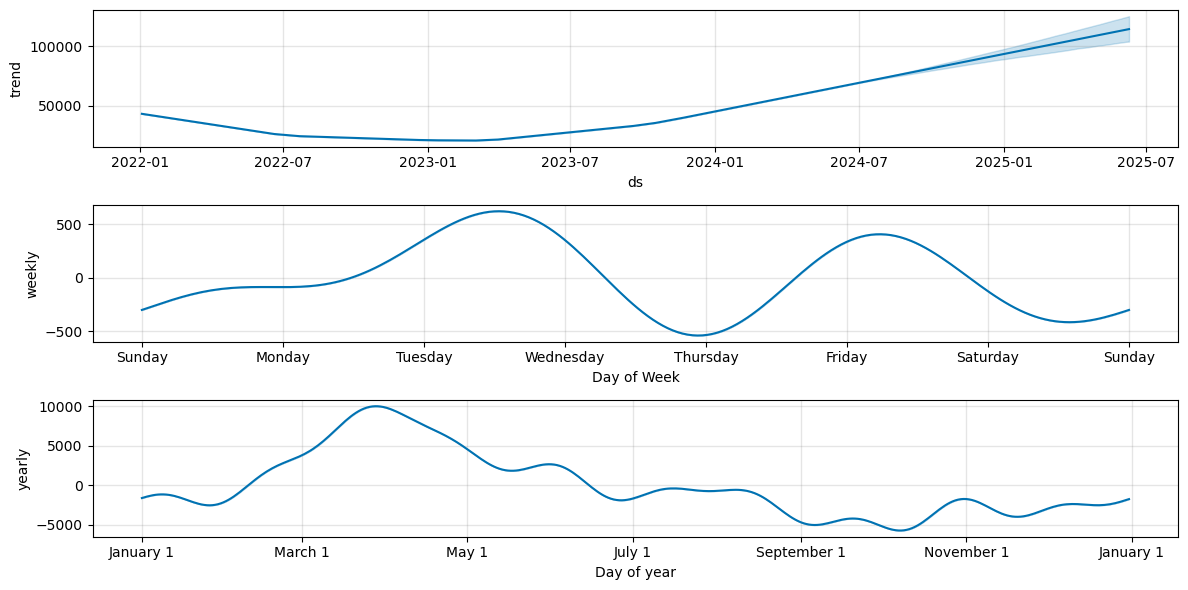

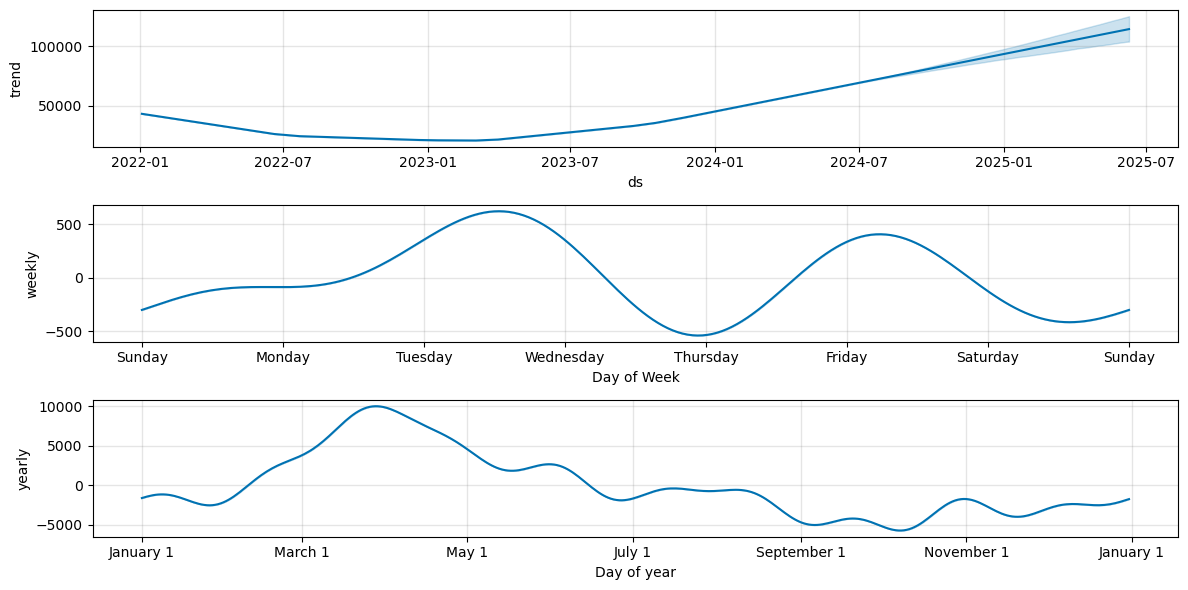

In [30]:
model.plot_components(forecast, figsize=(12,6))

### Prophet 심화

In [32]:
pre_b_df

,ds,y
0,2022-01-03,47327.87
1,2022-01-07,43120.63
2,2022-01-11,41849.00
3,2022-01-15,43099.37
4,2022-01-19,42381.48
...,...,...
218,2024-05-24,67942.23
219,2024-05-28,69374.17
220,2024-06-01,67484.93
221,2024-06-05,70553.24


In [33]:
y_train = pre_b_df.iloc[:int(0.8 * len(pre_b_df))]
y_train

,ds,y
0,2022-01-03,47327.87
1,2022-01-07,43120.63
2,2022-01-11,41849.00
3,2022-01-15,43099.37
4,2022-01-19,42381.48
...,...,...
173,2023-11-26,37800.94
174,2023-11-30,37867.37
175,2023-12-04,39976.04
176,2023-12-08,43298.70


In [34]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# changepoint_prior_scale : trend의 변화하는 크기를 반영하는 정도이다. 0.05가 default
# seasonality_prior_scale : 계절성을 반영하는 단위이다.
# seasonality_mode : 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.


search_space = {
    'changepoint_prior_scale' : [0.05,0.1,0.5,1.0,5.0,10.0],
    'seasonality_prior_scale' : [0.05,0.1,0.5,1.0,10.0],
    'seasonality_mode' : ['additive', 'multiplicative']
}

# itertools.product : 각 요소들의 모든 경우의 수 조합으로 생성

train_len = int(len(pre_b_df)*0.8)
test_len = int(len(pre_b_df)*0.2)

train_size = f'{train_len} days'
tset_size = f'{test_len} days'

# 'threads' 옵션은 메머리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
# 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
# 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만 메모리 사용량이 높을 수 있다.

for v in itertools.product(*search_space.values()):
    


[0.05, 0.1, 0.5, 1.0, 5.0, 10.0] [0.05, 0.1, 0.5, 1.0, 10.0] ['additive', 'multiplicative']
